# SIMBA: Inference Notebook

This notebook demonstrates how to run inference using **SIMBA** (Spectral Identification of Molecule Bio-Analogues), a deep learning model designed to predict structural similarity between pairs of MS/MS spectra.


### What this notebook covers:
- **Loading the trained SIMBA model** and required libraries
- **Preprocessing MS/MS spectra**: normalizing, cleaning, and formatting inputs
- **Running the model** to obtain similarity predictions between spectral pairs
- **Visualizing results**, including substructure edit distance and MCES predictions

### Requirements:
- Trained SIMBA model checkpoint
- Mass spectrometry input data (e.g., as .mgf or .mzML files, or as processed arrays)
- Dependencies listed in the project repository

In [54]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
from simba.config import Config
from simba.simba.simba import Simba
from simba.simba.preprocessing_simba import PreprocessingSimba
from simba.simba.plotting import Plotting
from simba.simba.analog_discovery import AnalogDiscovery
import numpy as np
import spectrum_utils.plot as sup
from rdkit import Chem


* In this notebook, we load spectra from a mgf file and this is run on SIMBA to produce the corresponding edit distance and mces distances

In [56]:
config=Config()
config.USE_LEARNABLE_MULTITASK=True

In [57]:
model_location = '/Users/sebas/projects/data/best_model_20250422_only_massspecgym.ckpt'
mgf_file = '/Users/sebas/projects/data/ALL_GNPS_NO_PROPOGATED_wb.mgf'
casmi_file= '/Users/sebas/projects/data/processed_massformer/spec_df.pkl' 

## Initialize Simba

In [58]:
simba= Simba(model_location, config=config, device='cpu', cache_embeddings=True)

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/lightning/pytorch/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/lightning/pytorch/core/saving.py:177: Found keys that are not in the model state dict but in the checkpoint: ['log_sigma1', 'log_sigma2']


## load mgf file

In [59]:
all_spectrums=PreprocessingSimba.load_spectra(casmi_file, config, use_gnps_format=False)

/Users/sebas/projects/data/processed_massformer/spec_df.pkl


In [60]:
len(all_spectrums)

158

Let's take 400=20x20 random pairs and calculate the similarities.

In [61]:
np.random.seed(42)
random_indexes_0= np.random.randint(0,len(all_spectrums),20)
random_indexes_1= np.random.randint(0,len(all_spectrums),20)

In [62]:
## spectrums of the first index
import copy
all_spectrums_0 = copy.deepcopy([all_spectrums[index] for index in random_indexes_0])
all_spectrums_1 = copy.deepcopy([all_spectrums[index] for index in random_indexes_1])

In [63]:
len(all_spectrums_0)

20

## Predictions

In [64]:
sim_ed, sim_mces= simba.predict(all_spectrums_0, all_spectrums_1)

Preprocessing all the data ...


20it [00:00, 58457.20it/s]


Finished preprocessing 
loading data
Normalizing intensities
Preprocessing all the data ...


20it [00:00, 40563.87it/s]

Finished preprocessing 
loading data
Normalizing intensities
running
Processing embeddings ...



GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/lightning/pytorch/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=10` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

/Users/sebas/projects/metabolomics/simba/transformers/spectrum_transformer_encoder_custom.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mass_precursor = torch.tensor(kwargs["precursor_mass"].float())
/Users/sebas/projects/metabolomics/simba/transformers/spectrum_transformer_encoder_custom.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  charge_precursor = torch.tensor(kwargs["precursor_charge"].float())
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


running
Processing embeddings ...


Predicting: |                                                                                                 …

/Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/lightning/pytorch/core/saving.py:177: Found keys that are not in the model state dict but in the checkpoint: ['log_sigma1', 'log_sigma2']
20it [00:00, 4721.45it/s]

Elapsed time: 0.04 seconds


## Ground truth

In [65]:
from simba.simba.ground_truth import GroundTruth

In [66]:
ground_truth_ed=GroundTruth.compute_edit_distance(all_spectrums_0, all_spectrums_1)

In [67]:
import myopic_mces

In [68]:
ground_truth_mces=GroundTruth.compute_mces(all_spectrums_0, all_spectrums_1)

Running myopic ...


python(6120) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/f7218dbeac3e45278657ae84428f532d-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/f7218dbeac3e45278657ae84428f532d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 1284 COLUMNS
At line 7567 RHS
At line 8847 BOUNDS
At line 9613 ENDATA
Problem MODEL has 1279 rows, 765 columns and 4654 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 17.9971 - 0.08 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 23 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 23 strengthened rows, 0 substitutions
Cgl0004I processed model has 807 rows, 765 columns (765 integer (765 of which b

python(6139) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/0f4c9d3b4c0b4431bfe5ebf5771cae80-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/0f4c9d3b4c0b4431bfe5ebf5771cae80-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 844 COLUMNS
At line 5216 RHS
At line 6056 BOUNDS
At line 6596 ENDATA
Problem MODEL has 839 rows, 539 columns and 3232 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 9 - 0.04 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 9 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 9 strengthened rows, 0 substitutions
Cgl0004I processed model has 575 rows, 539 columns (539 integer (539 of which binary)) an

python(6157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/65fc01fdb4ef4d27a609407b625dd451-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/65fc01fdb4ef4d27a609407b625dd451-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 780 COLUMNS
At line 4968 RHS
At line 5744 BOUNDS
At line 6223 ENDATA
Problem MODEL has 775 rows, 478 columns and 3022 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 15.2266 - 0.03 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 14 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 14 strengthened rows, 0 substitutions
Cgl0004I processed model has 494 rows, 466 columns (466 integer (466 of which bin

python(6174) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/f599a51ec1b341869ed633b6f0fe3b24-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/f599a51ec1b341869ed633b6f0fe3b24-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 842 COLUMNS
At line 5862 RHS
At line 6700 BOUNDS
At line 7267 ENDATA
Problem MODEL has 837 rows, 566 columns and 3634 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 15.7932 - 0.06 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 8 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 8 strengthened rows, 0 substitutions
Cgl0004I processed model has 581 rows, 554 columns (554 integer (554 of which binar

python(6206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/68bf4df2f5924a9cbbc72a30b0ccb226-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/68bf4df2f5924a9cbbc72a30b0ccb226-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 928 COLUMNS
At line 4848 RHS
At line 5772 BOUNDS
At line 6232 ENDATA
Problem MODEL has 923 rows, 459 columns and 2840 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.02 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.02   (Wallclock seconds):       0.02

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/envs/tran

python(6218) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/b57afb36f5574cffa14445c6c55b8b03-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/b57afb36f5574cffa14445c6c55b8b03-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 1326 COLUMNS
At line 7433 RHS
At line 8755 BOUNDS
At line 9495 ENDATA
Problem MODEL has 1321 rows, 739 columns and 4524 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.06 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.06   (Wallclock seconds):       0.06

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/envs/tr

python(6231) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/5f358412a0134b64a0e08254d68a2ddd-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/5f358412a0134b64a0e08254d68a2ddd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 1284 COLUMNS
At line 7567 RHS
At line 8847 BOUNDS
At line 9613 ENDATA
Problem MODEL has 1279 rows, 765 columns and 4654 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 17.9971 - 0.08 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 23 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 23 strengthened rows, 0 substitutions
Cgl0004I processed model has 807 rows, 765 columns (765 integer (765 of which b

python(6249) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/bfe4cd6523ec42dcacaf10e0ff0c09ee-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/bfe4cd6523ec42dcacaf10e0ff0c09ee-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 2019 COLUMNS
At line 10714 RHS
At line 12729 BOUNDS
At line 13763 ENDATA
Problem MODEL has 2014 rows, 1033 columns and 6421 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.12 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.13   (Wallclock seconds):       0.13

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/env

python(6264) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/ac1d1b9b318b4d8d8d9fc5c6d8ef7c1f-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/ac1d1b9b318b4d8d8d9fc5c6d8ef7c1f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 2415 COLUMNS
At line 14033 RHS
At line 16444 BOUNDS
At line 17793 ENDATA
Problem MODEL has 2410 rows, 1348 columns and 8553 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.18 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.18   (Wallclock seconds):       0.19

Finished myopic
reading csv
Running myopic ...


python(6269) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/66a1c41d91cd4920989f7ef21a40d338-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/66a1c41d91cd4920989f7ef21a40d338-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 844 COLUMNS
At line 4934 RHS
At line 5774 BOUNDS
At line 6254 ENDATA
Problem MODEL has 839 rows, 479 columns and 2972 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 15.1805 - 0.03 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 5 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 5 strengthened rows, 0 substitutions
Cgl0004I processed model has 512 rows, 477 columns (477 integer (477 of which binar

python(6288) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/1489bf18b4a04cf7a8046e4dc5b18995-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/1489bf18b4a04cf7a8046e4dc5b18995-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 1074 COLUMNS
At line 7312 RHS
At line 8382 BOUNDS
At line 9142 ENDATA
Problem MODEL has 1069 rows, 759 columns and 4631 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 13.9474 - 0.08 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 3 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 3 strengthened rows, 0 substitutions
Cgl0004I processed model has 798 rows, 759 columns (759 integer (759 of which bin

python(6307) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/10dfebe8204848bc826b9cdc86acb085-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/10dfebe8204848bc826b9cdc86acb085-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 906 COLUMNS
At line 5667 RHS
At line 6569 BOUNDS
At line 7136 ENDATA
Problem MODEL has 901 rows, 566 columns and 3494 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 12.4247 - 0.05 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 10 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 10 strengthened rows, 0 substitutions
Cgl0004I processed model has 600 rows, 566 columns (566 integer (566 of which bin

python(6325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/8480ae33b24848c7bb4881ef7b182cd6-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/8480ae33b24848c7bb4881ef7b182cd6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 1200 COLUMNS
At line 7784 RHS
At line 8980 BOUNDS
At line 9778 ENDATA
Problem MODEL has 1195 rows, 797 columns and 4878 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 16.9364 - 0.09 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 10 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 10 strengthened rows, 0 substitutions
Cgl0004I processed model has 838 rows, 797 columns (797 integer (797 of which b

python(6345) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/3956ac6029864d878bc302418088e88a-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/3956ac6029864d878bc302418088e88a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 1200 COLUMNS
At line 7595 RHS
At line 8791 BOUNDS
At line 9539 ENDATA
Problem MODEL has 1195 rows, 747 columns and 4672 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.08 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.09   (Wallclock seconds):       0.09

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/envs/tr

python(6374) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/6b74d94ea341416f8b06cee1598e4e3e-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/6b74d94ea341416f8b06cee1598e4e3e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 4000 COLUMNS
At line 26382 RHS
At line 30378 BOUNDS
At line 33065 ENDATA
Problem MODEL has 3995 rows, 2686 columns and 16860 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 20 - 1.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 49 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 49 strengthened rows, 0 substitutions
Cgl0004I processed model has 2767 rows, 2686 columns (2686 integer (2686 of whi

python(6381) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/cb39a39dba7245dbaf40a6dba04ffed6-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/cb39a39dba7245dbaf40a6dba04ffed6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 780 COLUMNS
At line 5344 RHS
At line 6120 BOUNDS
At line 6673 ENDATA
Problem MODEL has 775 rows, 552 columns and 3370 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 9.71178 - 0.05 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 2 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 2 strengthened rows, 0 substitutions
Cgl0004I processed model has 585 rows, 552 columns (552 integer (552 of which binar

python(6399) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/09a91315b9e742f996d8c6f9bffb4dfb-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/09a91315b9e742f996d8c6f9bffb4dfb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 161 COLUMNS
At line 656 RHS
At line 813 BOUNDS
At line 882 ENDATA
Problem MODEL has 156 rows, 68 columns and 343 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 7 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 2 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 2 strengthened rows, 0 substitutions
Cgl0004I processed model has 63 rows, 54 columns (54 integer (54 of which binary)) and 232 ele

python(6406) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/472258f18b0547c1a6f87adb06e51e1b-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/472258f18b0547c1a6f87adb06e51e1b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 1078 COLUMNS
At line 6176 RHS
At line 7250 BOUNDS
At line 7867 ENDATA
Problem MODEL has 1073 rows, 616 columns and 3701 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.04 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.04   (Wallclock seconds):       0.04

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/envs/tr

python(6412) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/b7b9cf5499b54303b17bdff01a224ab3-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/b7b9cf5499b54303b17bdff01a224ab3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 844 COLUMNS
At line 4934 RHS
At line 5774 BOUNDS
At line 6254 ENDATA
Problem MODEL has 839 rows, 479 columns and 2972 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 15.1805 - 0.03 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 5 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 5 strengthened rows, 0 substitutions
Cgl0004I processed model has 512 rows, 477 columns (477 integer (477 of which binar

python(6431) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sebas/miniconda3/envs/transformers/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/e7e367eb476f468ea9395aed10868343-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/4x/y1dnj1n55js4gtv69lsx4g4h0000gn/T/e7e367eb476f468ea9395aed10868343-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 842 COLUMNS
At line 5862 RHS
At line 6700 BOUNDS
At line 7267 ENDATA
Problem MODEL has 837 rows, 566 columns and 3634 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 16.2786 - 0.06 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 8 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 8 strengthened rows, 0 substitutions
Cgl0004I processed model has 598 rows, 566 columns (566 integer (566 of which binar

(array([  4.,   5.,  71., 165.,  81.,  43.,  17.,   8.,   4.,   2.]),
 array([ 0. ,  5.9, 11.8, 17.7, 23.6, 29.5, 35.4, 41.3, 47.2, 53.1, 59. ]),
 <BarContainer object of 10 artists>)

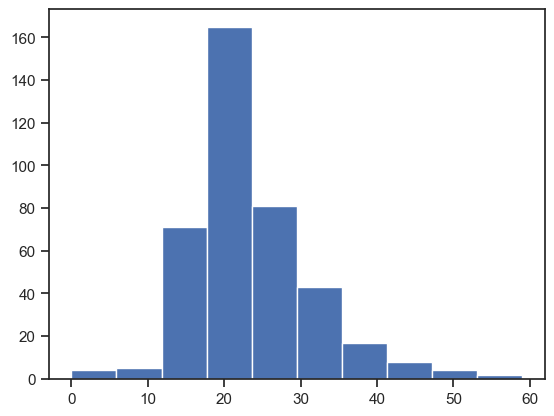

In [69]:
import matplotlib.pyplot as plt
plt.hist(np.reshape(ground_truth_mces,-1))

## Comparison between predictions and ground truth

In [70]:
from scipy.stats import spearmanr

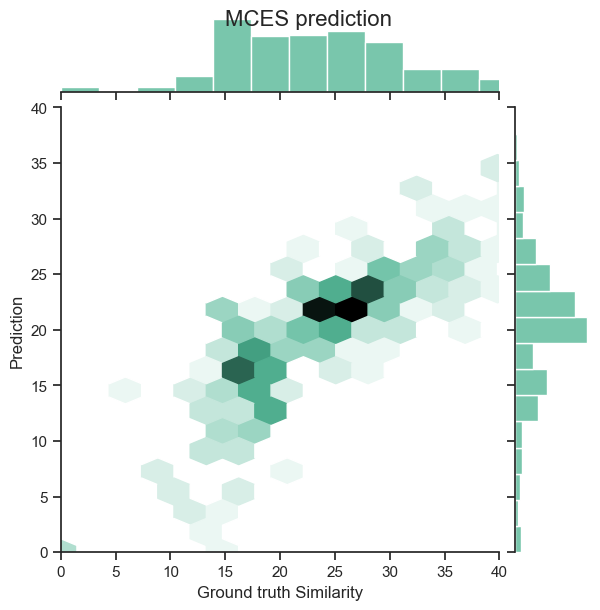

In [71]:
Plotting.plot_mces(np.reshape(ground_truth_mces,-1), np.reshape(sim_mces,-1))

Accuracy: 0.695


/Users/sebas/projects/metabolomics/simba/simba/plotting.py:42: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


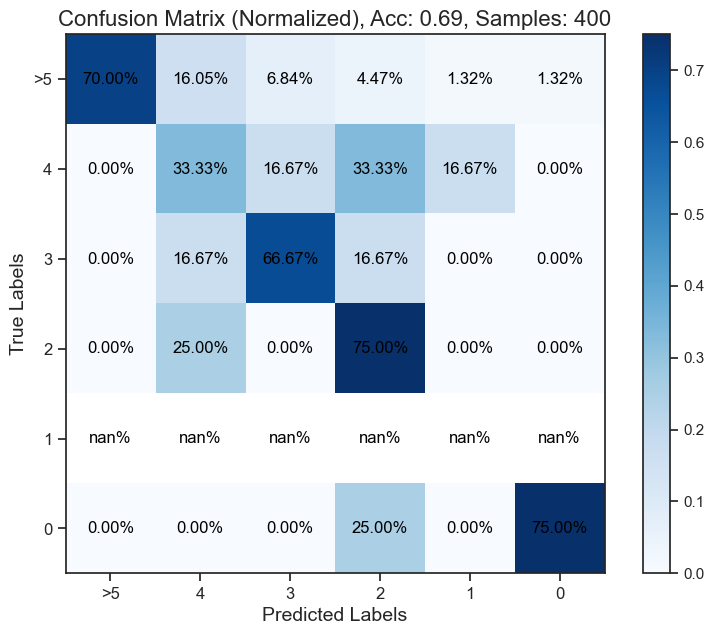

In [72]:
Plotting.plot_cm(5-np.reshape(ground_truth_ed,-1), 5-np.reshape(sim_ed,-1))

## Check the closest spectra

* It returns a ranking matrix where if the score is higher, the similarity is higher based on reranking of MCES and Edit distance 

In [73]:

ranking= AnalogDiscovery.compute_ranking(sim_mces, sim_ed)

## Plot the closest spectra

In [74]:
target_index=9

In [75]:
best_match_index= np.argmax(ranking[target_index])


* Ground truth

In [76]:
print(f'Edit distance {ground_truth_ed[target_index, best_match_index]}, MCES distance {ground_truth_mces[target_index, best_match_index]}')

Edit distance 5.0, MCES distance 16.0


* Prediction

In [77]:
print(f'Edit distance {sim_ed[target_index, best_match_index]}, MCES distance {sim_mces[target_index, best_match_index]}')

Edit distance 4, MCES distance 13.339416980743408


In [78]:
spectra_0= all_spectrums_0[target_index]

In [79]:
spectra_1= all_spectrums_1[best_match_index]

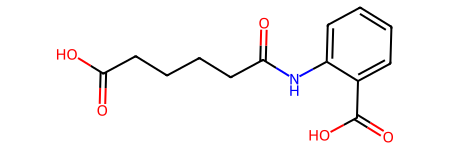

In [80]:
Chem.MolFromSmiles(spectra_0.params['smiles'])

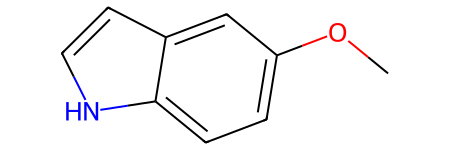

In [81]:
Chem.MolFromSmiles(spectra_1.params['smiles'])

In [82]:
spectra_0.params

{'spectrumid': '307 M+H',
 'name': '307 M+H',
 'inchi': '',
 'organism': 'casmi',
 'id': 307,
 'smiles': 'O=C(O)CCCCC(=O)Nc1ccccc1C(=O)O',
 'ionmode': 'Positive',
 'pepmass': [266.102037994695],
 'charge': [1],
 'libraryquality': 1}

In [83]:
spectra_1.params

{'spectrumid': '226 M+H',
 'name': '226 M+H',
 'inchi': '',
 'organism': 'casmi',
 'id': 226,
 'smiles': 'COc1ccc2[nH]ccc2c1',
 'ionmode': 'Positive',
 'pepmass': [148.075452106098],
 'charge': [1],
 'libraryquality': 1}

<Axes: xlabel='m/z', ylabel='Intensity'>

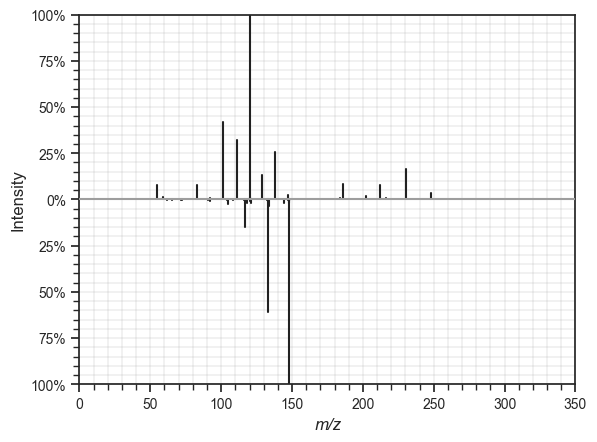

In [84]:
sup.mirror(spectra_0, spectra_1)